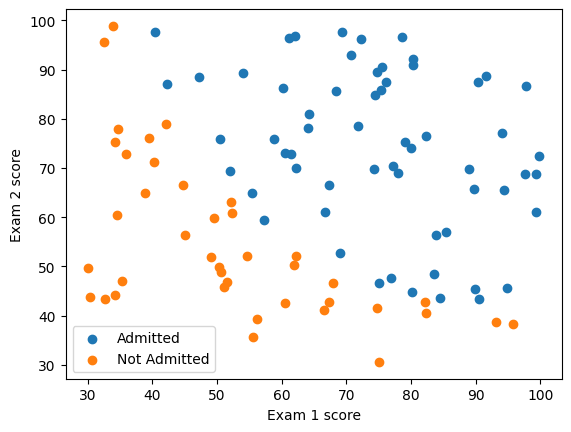

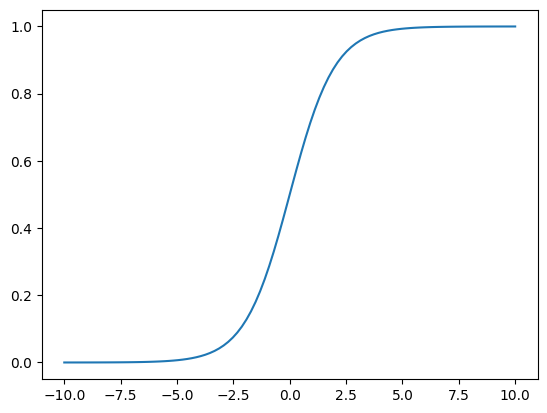

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]
0.2183301938265977
[0.04290299 2.56623412 2.64679737]
0.2034977100735217
[-25.15378124   0.2061713    0.2014105 ]


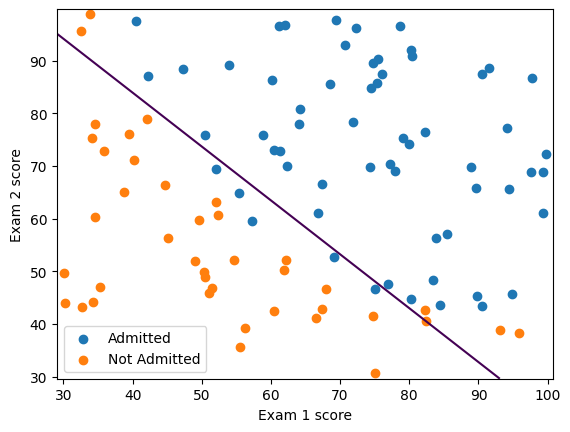

0.7762281208978543


0.89

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

data=np.loadtxt("ex2data1.txt",delimiter=',')
X=data[:,[0,1]]
y=data[:,2]

X[:5]

y[:5]

plt.figure()
plt.scatter(X[y==1][:,0],X[y==1][:,1],label="Admitted")
plt.scatter(X[y==0][:,0],X[y==0][:,1],label="Not Admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot()
X_plot=np.linspace(-10,10,100)
plt.plot(X_plot,sigmoid(X_plot))
plt.show()

def costFunction (theta,X,y):
    h=sigmoid(np.dot(X,theta))
    J=-(np.dot(y,np.log(h))+np.dot(1-y,np.log(1-h)))/X.shape[0]
    grad=np.dot(X.T,h-y)/X.shape[0]
    return J,grad

X_train=np.hstack((np.ones((X.shape[0],1)),X))
theta=np.array([0,0,0])
J,grad=costFunction(theta,X_train,y)
print(J)
print(grad)

X_train=np.hstack((np.ones((X.shape[0],1)),X))
theta=np.array([-24,0.2,0.2])
J,grad=costFunction(theta,X_train,y)
print(J)
print(grad)

def cost (theta,X,y):
    h=sigmoid(np.dot(X,theta))
    J=-(np.dot(y,np.log(h))+np.dot(1-y,np.log(1-h)))/X.shape[0]
    return J

def gradient (theta,X,y):
    h=sigmoid(np.dot(X,theta))
    grad=np.dot(X.T,h-y)/X.shape[0]
    return grad

X_train=np.hstack((np.ones((X.shape[0],1)),X))
theta=np.array([0,0,0])
res=optimize.minimize(fun=cost,x0=theta,args=(X_train,y),method='Newton-CG',jac=gradient)
print(res.fun)
print(res.x)

def plotDecisionBoundary(theta,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    X_plot=np.c_[xx.ravel(),yy.ravel()]
    X_plot=np.hstack((np.ones((X_plot.shape[0],1)),X_plot))
    y_plot=np.dot(X_plot,theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y==1][:,0],X[y==1][:,1],label="Admitted")
    plt.scatter(X[y==0][:,0],X[y==0][:,1],label="Not Admitted")
    plt.contour(xx,yy,y_plot,levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()


plotDecisionBoundary(res.x,X,y)

prob=sigmoid(np.dot(np.array([1,45,85]),res.x))
print(prob)

def predict(theta,X):
    X_train =np.hstack((np.ones((X.shape[0],1)),X))
    prob=sigmoid(np.dot(X_train,theta))
    return (prob>=0.5).astype(int)
np.mean(predict(res.x,X)==y)
